In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage, skimage.io, skimage.filters
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set cwd back to default
os.chdir('../')

In [3]:
## NN libs
import keras
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Reshape, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# custom scripts
import config # params, constants
import data, models # functions that mutate outr data
from utils import utils, plot # custom functions, in local environment

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'validation' = ['img_name']
    , 'labels' = pandas.df('img_name','label')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


# Prepare dataset
amt should be either 50, 100, 150, 200 etc...

In [8]:
def gen_labels_random(amt_labels, amt_classes=9):
    return [int((np.random.random() * amt_classes) ) for _ in range(amt_labels)]

def gen_labels(amt_labels, amt_classes=9):
    # beware of a large number of classes
    return [ int(x_train[i].mean() * 10) for i in range(x_train.shape[0]) ]

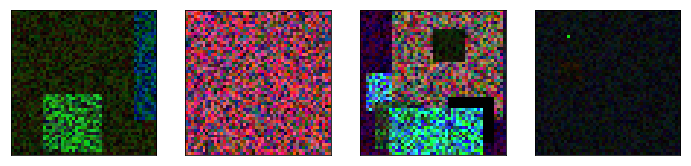

In [10]:
# plot.multiple(x_train)

### Prepare the labels

Encode the labels to one-hot vectors

In [11]:
# # int-labels => one-hot vectors
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# print('n labels:',y_train[0].shape)
# print(y_train.shape)
# y_train[0]

n labels: (4,)
(4, 4)


array([0., 1., 0., 0.])

## 2D decoder

In [472]:
# input length controls the complexity of the final distribution
# higher input values result in a more normal output distribution and a more circular graph
input_length = 2 
input_shape = (input_length,)
w = 100 # width of the network
k_init = 'glorot_normal' # random_uniform glorot_normal
b_init = 'glorot_normal'

In [473]:
input_ = Input(shape=input_shape)
x = Dense(w, activation='relu')(input_) # (None, 128)
for i in range(10):
    x = Dense(w, activation='relu', kernel_initializer=k_init, bias_initializer=b_init)(x) # (None, 128)
# for i in range(10):
# x = Reshape(x)
# x = keras.layers.UpSampling1D(())(x)
    #     x = Conv2D(3, (3, 3), activation='relu')(x)


# x = Reshape((4,4,8))(x) # (None, 4, 4, 8)  
# x = UpSampling2D((8, 8))(x) # (None, 32, 32, 8)
# x = Conv2D(4, (8, 8), activation='relu')(x) # (None, 25, 25, 4)
# x = UpSampling2D((2, 2))(x) # (None, 100, 100, 4)
# x = Conv2D(3, (1, 1), activation='relu')(x) # (None, 50, 50, 3) 

n_colors = 3
output_w = 300
output_h = 200
n_outputs = output_h * output_w * n_colors
output_shape = (output_h, output_w, n_colors)
# print('output_shape:', output_shape)
# resized = Dense(n_outputs, activation='sigmoid')(x)
# x = Reshape(output_shape)(resized)
x = Dense(2,activation='sigmoid')(x)

decoder = Model(input_, x)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_88 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_483 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_484 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_485 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_486 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_487 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_488 (Dense)            (None, 100)               10100     
__________

In [474]:
decoder.compile(optimizer='adam', loss='categorical_crossentropy')

In [475]:
n = 1000 * 100
x_test = np.random.random([n,input_length])
# samples = np.stack([sample])
y_test = decoder.predict(x_test)

In [476]:
print(y_test.shape)
print(y_test.max(), y_test.min())

(100000, 2)
0.6327934 0.46468762


In [477]:
# TODO use sklearn.preprocessing.normalize(axis=0) # to normalize each feature
def normalize2D(y_test):
    maxx = y_test.max()
    minn = y_test.min()
    return (y_test.copy() - minn) / (maxx - minn)

In [478]:
normalized = normalize2D(y_test)

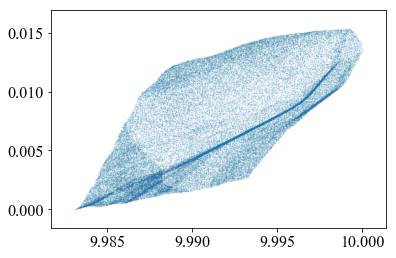

In [479]:
a = 10
# result = y_test
result = normalized
plt.scatter(result[:,0] * a,result[:,1] * a, alpha=0.1, s=0.1)

In [397]:
# plt.savefig('../plots/gan.png', bbox_inches='tight')

In [398]:
normalized.mean()

0.49239683

# 3D decoder

In [480]:
input_length = 2 # this controls the complexity of the final distribution
input_shape = (input_length,)
output_length = 3 # 3d
w = 100 # width of the network
k_init = 'glorot_normal' # random_uniform glorot_normal
b_init = 'glorot_normal'

In [481]:
input_ = Input(shape=input_shape)
x = Dense(w, activation='relu')(input_) # (None, 128)
for i in range(10):
    x = Dense(w, activation='relu', kernel_initializer=k_init, bias_initializer=b_init)(x) # (None, 128)

x = Dense(output_length ,activation='sigmoid')(x)

decoder = Model(input_, x)
decoder.summary()

decoder.compile(optimizer='adam', loss='categorical_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_89 (InputLayer)        (None, 2)                 0         
_________________________________________________________________
dense_495 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_496 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_497 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_498 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_499 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_500 (Dense)            (None, 100)               10100     
__________

In [503]:
n = 1000 * 10
x_test = np.random.random([n,input_length])
# samples = np.stack([sample])
y_test = decoder.predict(x_test)
print('shape:', y_test.shape)
print('minmax',y_test[0].max(), y_test[0].min())

shape: (10000, 3)
minmax 0.5034836 0.462451


In [558]:
a = 10
# for frame in y_test[:0]:
#     result = normalize2D(frame)
#     plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

In [545]:
result = y_test[:,1:3]
result = normalize(result)
result.shape

(10000, 2)

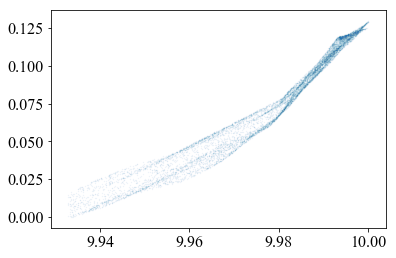

In [506]:
plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

In [585]:
# normalize z_values
from sklearn.preprocessing import normalize
def normalize1D(vector=[]):
    minn = vector.min()
    maxx = vector.max()
    return (vector.copy() - minn) / (maxx - minn)

In [588]:
# z values correspond to the 3d dimension (time)
z_values = y_test[:,0]
z_values = normalize1D(z_values)

(array([ 394.,  779., 1084., 1078., 1018., 1034., 1271., 1399., 1346.,
         597.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

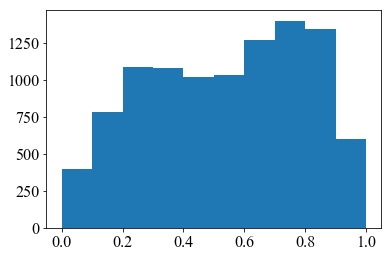

In [594]:
plt.hist(z_values)

In [635]:
frames_list = []
n_frames = 3
for i in range(n_frames):
    lower = i * 1./n_frames
    upper = (i+1) * 1./n_frames
    c = (lower <= z_values) & (z_values < upper)
    frames = (y_test[np.where(c)])
    frames_list.append(frames)
    #     frames = y_test[ np.where(z_values < 0.5) ]

frame = frames_list[0]
frames[:,1:3].shape

(3782, 2)

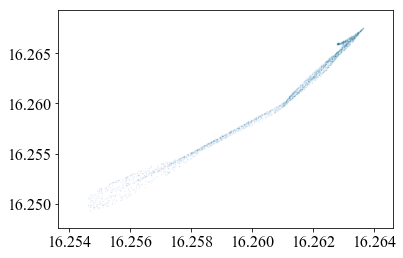

In [636]:
frame = frames_list[0]
# result = normalize2D(frames[:,1:3])
result = normalize(frames[:,1:3], axis=0)
a = 1000
plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)

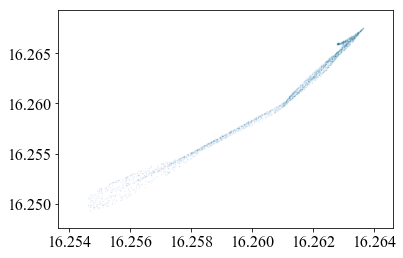

In [638]:
frame = frames_list[-1]
# result = normalize2D(frames[:,1:3])
result = normalize(frames[:,1:3], axis=0)
a = 1000
plt.scatter(result[:,0] * a, result[:,1] * a, alpha=0.1, s=0.1)